In [3]:
import pandas as pd

In [7]:
df = pd.read_csv('/content/sample_data/household_power_consumption.txt', sep=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# ***16. Aplique uma amostragem aleatória de 1% dos dados e verifique se a distribuição de Global_active_power é semelhante à da base completa***

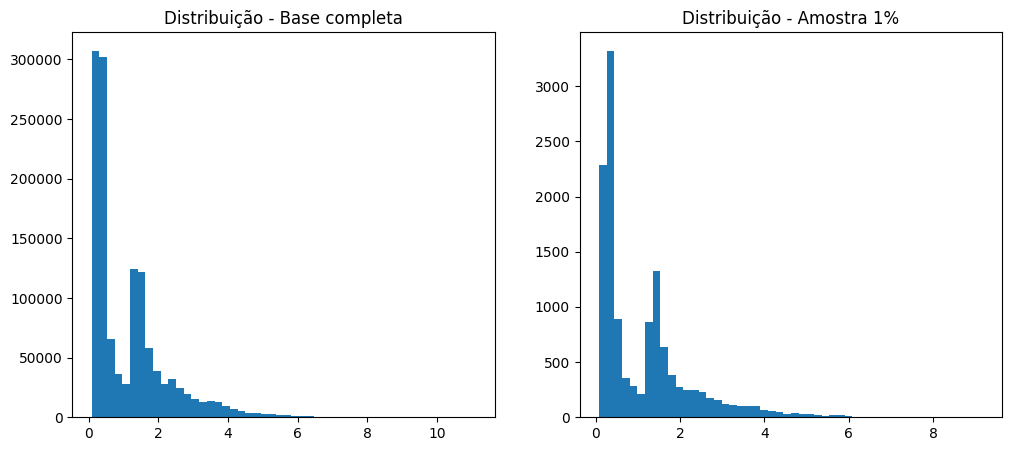

In [13]:
#53939 -> 539
import matplotlib.pyplot as plt
import pandas as pd # Import pandas explicitly

# 1. Ler os dados (ajuste o separador e caminho do arquivo conforme necessário)
df = pd.read_csv("/content/sample_data/household_power_consumption.txt", sep=";",
                 low_memory=False, na_values="?")

# 2. Transformar a coluna em numérica (se não estiver)
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")

# 3. Remover valores nulos
df = df.dropna(subset=["Global_active_power"])

# 4. Criar amostra de 1%
sample_df = df.sample(frac=0.01, random_state=42)

# 5. Comparar distribuições com histogramas
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(df["Global_active_power"], bins=50)
plt.title("Distribuição - Base completa")

plt.subplot(1,2,2)
plt.hist(sample_df["Global_active_power"], bins=50)
plt.title("Distribuição - Amostra 1%")

plt.show()

# ***17. Utilize uma técnica de normalização (Min-Max Scaling) para padronizar as variáveis numéricas principais***

In [12]:
# Identificar colunas numéricas (excluindo 'Date' e 'Time')
colunas_numericas = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Aplicar normalização Min-Max manualmente
for coluna in colunas_numericas:
    min_val = df[coluna].min()
    max_val = df[coluna].max()
    # Evitar divisão por zero caso a coluna tenha valores constantes
    if max_val - min_val != 0:
        df[coluna] = (df[coluna] - min_val) / (max_val - min_val)
    else:
        # Se todos os valores forem iguais, a normalização resulta em 0
        df[coluna] = 0

# Exibir as primeiras linhas dos dados normalizados
display(df.head())

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,0.85
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,0.80
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,0.85
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,0.85
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,0.85


# ***18. Aplique K-means para segmentar os dias em 3 grupos distintos de consumo elétrico. Interprete os resultados***

In [14]:
# Converter a coluna 'Date' para o formato datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Converter 'Global_active_power' para numérico, tratando erros
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

# Remover linhas onde 'Global_active_power' se tornou NaN após a conversão
df.dropna(subset=['Global_active_power'], inplace=True)


# Agregar os dados por dia e calcular a média do 'Global_active_power'
daily_consumption = df.groupby('Date')['Global_active_power'].mean().reset_index()

# Exibir as primeiras linhas dos dados agregados por dia
display(daily_consumption.head())

,Date,Global_active_power
0,2006-12-16,3.053475
1,2006-12-17,2.354486
2,2006-12-18,1.530435
3,2006-12-19,1.157079
4,2006-12-20,1.545658


In [15]:
from sklearn.cluster import KMeans

# Extrair a coluna 'Global_active_power' para o clustering
X = daily_consumption[['Global_active_power']].values

# Aplicar o algoritmo K-means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
daily_consumption['cluster'] = kmeans.fit_predict(X)

# Exibir as primeiras linhas dos dados com os clusters atribuídos
display(daily_consumption.head())

,Date,Global_active_power,cluster
0,2006-12-16,3.053475,2
1,2006-12-17,2.354486,2
2,2006-12-18,1.530435,1
3,2006-12-19,1.157079,1
4,2006-12-20,1.545658,1


# ***19. Realize uma decomposição de série temporal (tendência, sazonalidade e resíduo) para Global_active_power em um período de 6 meses.***

In [21]:
# 1. Ler os dados
df = pd.read_csv("/content/sample_data/household_power_consumption.txt", sep=";",low_memory=False, na_values="?")

# 2. Tratar colunas
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], dayfirst=True)
df = df.dropna(subset=["Global_active_power"])
df.set_index("Datetime", inplace=True)

# 3. Resample para série horária
df_resampled = df["Global_active_power"].resample("H").mean()

# 4. Selecionar 6 meses
seis_meses = df_resampled["2007-01-01":"2007-06-30"]

# Tendência: média móvel (7 dias = 24*7 horas)
tendencia = seis_meses.rolling(window=24*7, center=True).mean()

# Sazonalidade: média por hora do dia
sazonalidade = seis_meses.groupby(seis_meses.index.hour).transform("mean")

# Resíduo
residuo = seis_meses - tendencia - sazonalidade

# Exibir resultados
print("\n=== Tendência (estatísticas) ===")
print(tendencia.describe())

print("\n=== Sazonalidade (estatísticas) ===")
print(sazonalidade.describe())

print("\n=== Resíduo (estatísticas) ===")
print(residuo.describe())


=== Tendência (estatísticas) ===
count    3949.000000
mean        1.176611
std         0.364812
min         0.361583
25%         0.904231
50%         1.119016
75%         1.502247
max         1.855146
Name: Global_active_power, dtype: float64

=== Sazonalidade (estatísticas) ===
count    4344.000000
mean        1.164305
std         0.488833
min         0.488086
25%         0.905065
50%         1.067755
75%         1.509738
max         2.199863
Name: Global_active_power, dtype: float64

=== Resíduo (estatísticas) ===
count    3949.000000
mean       -1.161723
std         0.810179
min        -3.274559
25%        -1.712271
50%        -1.257421
75%        -0.769987
max         2.867132
Name: Global_active_power, dtype: float64


/tmp/ipython-input-510823333.py:11: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df["Global_active_power"].resample("H").mean()


# ***20. Treine um modelo de regressão linear simples para prever Global_active_power a partir de Global_intensity. Avalie o erro do modelo***

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 1. Ler os dados
df = pd.read_csv("/content/sample_data/household_power_consumption.txt", sep=";",
                 low_memory=False, na_values="?")

# 2. Tratar colunas numéricas
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df["Global_intensity"] = pd.to_numeric(df["Global_intensity"], errors="coerce")

# 3. Remover nulos
df = df.dropna(subset=["Global_active_power", "Global_intensity"])

# 4. Separar variáveis (X = intensidade, y = potência ativa)
X = df[["Global_intensity"]]
y = df["Global_active_power"]

# 5. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Treinar modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Fazer previsões
y_pred = model.predict(X_test)

# 8. Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Coeficiente angular (beta1):", model.coef_[0])
print("Intercepto (beta0):", model.intercept_)
print("\n--- Avaliação do modelo ---")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

# O modelo apresenta MAE ≈ 0.34 e RMSE ≈ 0.49,
# o que indica que o erro médio da previsão é baixo em relação aos valores de Global_active_power.
# O R² ≈ 0.99 mostra que cerca de 99% da variabilidade é explicada pela Global_intensity, logo o modelo tem um bom desempenho.

Coeficiente angular (beta1): 0.23768514637186858
Intercepto (beta0): -0.008606037341682526

--- Avaliação do modelo ---
MAE: 0.03420295524453056
RMSE: 0.049909603335801016
R²: 0.9978004143838975
